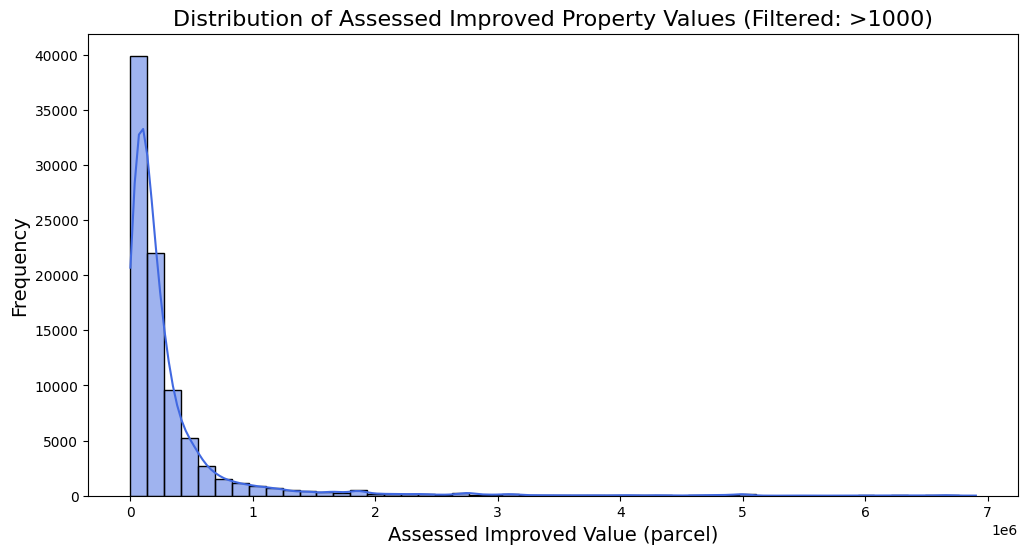

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = "final2.csv"  
df = pd.read_csv(file_path, low_memory=False)  

column_name = "Assessed Improved Value (parcel)"
if column_name in df.columns:
    values = df[column_name].dropna()


    filtered_values = values[(values >= 1000) & (values <= np.percentile(values, 99))]

    
    plt.figure(figsize=(12, 6))
    sns.histplot(filtered_values, bins=50, kde=True, color="royalblue", edgecolor="black")

    plt.xlabel("Assessed Improved Value (parcel)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.title("Distribution of Assessed Improved Property Values (Filtered: >1000)", fontsize=16)
    plt.show()
else:
    print(f"Column '{column_name}' not found in dataset.")


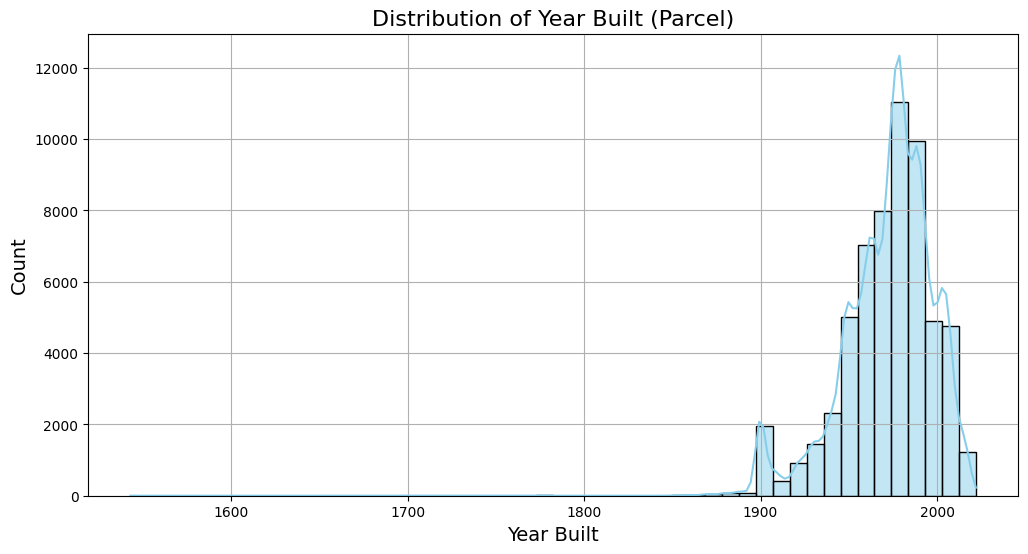

In [32]:

if "Year Built (parcel)" in df.columns:
    df_valid_years = df[df["Year Built (parcel)"] >= 500]

    
    plt.figure(figsize=(12, 6))
    sns.histplot(df_valid_years["Year Built (parcel)"], bins=50, kde=True, color="skyblue")

    
    plt.title("Distribution of Year Built (Parcel)", fontsize=16)
    plt.xlabel("Year Built", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.grid(True)
    plt.show()
else:
    print("Column 'Year Built (parcel)' not found in dataset.")


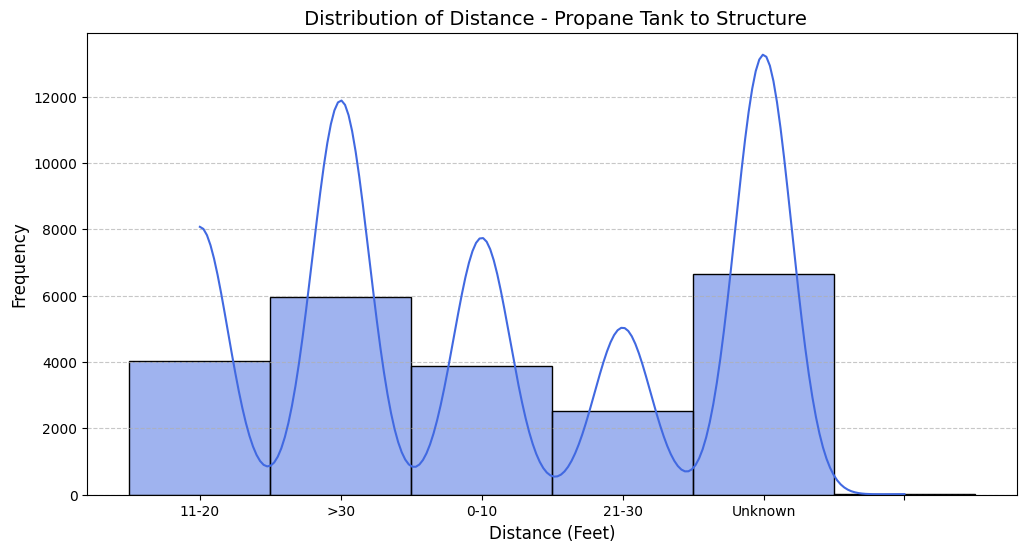

In [33]:

column_name = "Distance - Propane Tank to Structure"

if column_name in df.columns:

    data = df[column_name].dropna()
    
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data, bins=50, kde=True, color="royalblue", edgecolor="black")

    
    plt.title(f" Distribution of {column_name}", fontsize=14)
    plt.xlabel("Distance (Feet)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    
    plt.show()
else:
    print(f"Column '{column_name}' not found in dataset.")


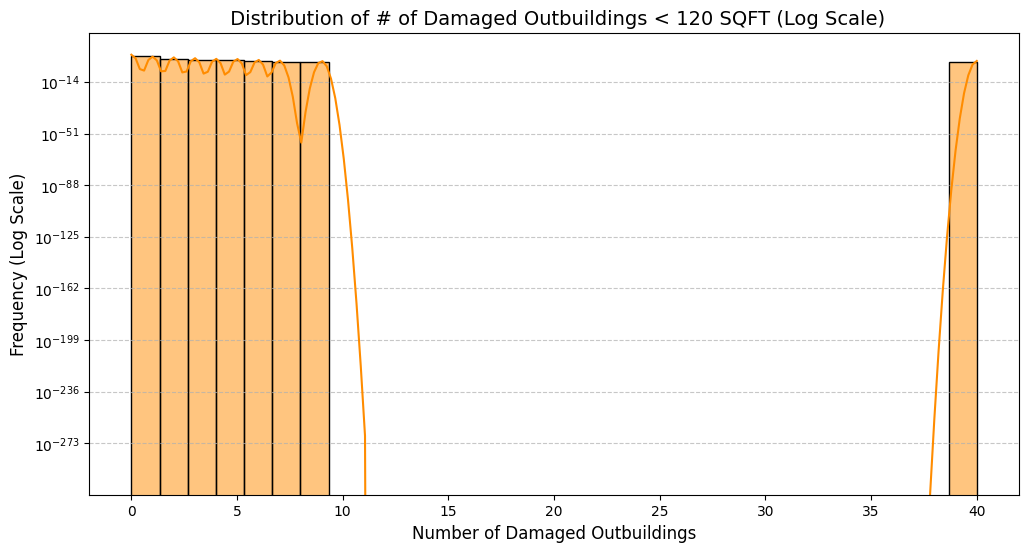

In [34]:

column_name = "# of Damaged Outbuildings < 120 SQFT"

if column_name in df.columns:
    
    data = df[column_name].dropna()


    plt.figure(figsize=(12, 6))
    sns.histplot(data, bins=30, kde=True, color="darkorange", edgecolor="black")


    plt.title(f" Distribution of {column_name} (Log Scale)", fontsize=14)
    plt.xlabel("Number of Damaged Outbuildings", fontsize=12)
    plt.ylabel("Frequency (Log Scale)", fontsize=12)
    

    plt.yscale("log")  
    plt.grid(axis="y", linestyle="--", alpha=0.7)


    plt.show()
else:
    print(f"Column '{column_name}' not found in dataset.")


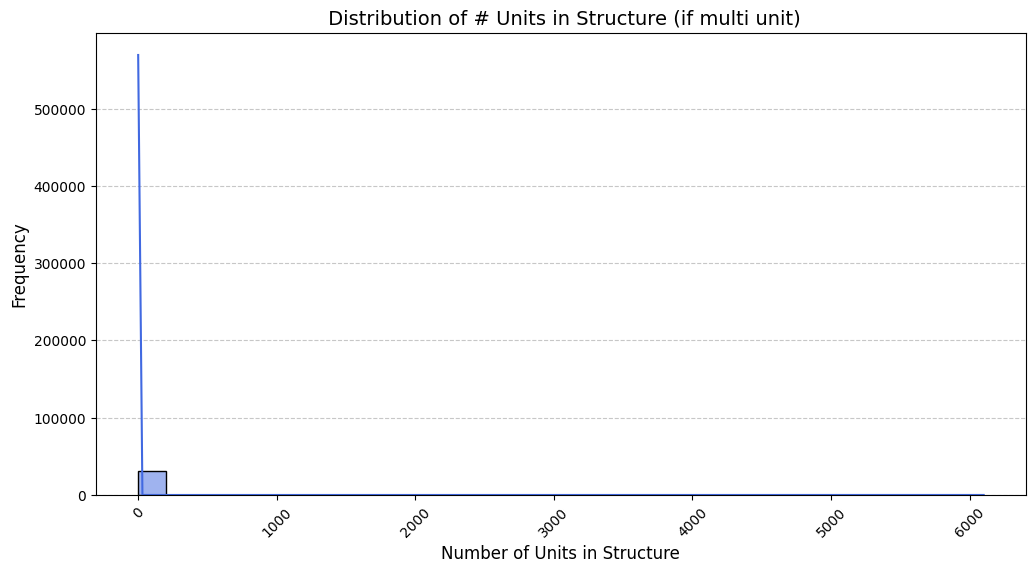

In [35]:

column_name = "# Units in Structure (if multi unit)"

if column_name in df.columns:
    
    data = df[column_name].dropna().astype(int)

    
    plt.figure(figsize=(12, 6))
    sns.histplot(data, bins=30, kde=True, color="royalblue", edgecolor="black")

    
    plt.title(f" Distribution of {column_name}", fontsize=14)
    plt.xlabel("Number of Units in Structure", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    
    plt.show()
else:
    print(f"Column '{column_name}' not found in dataset.")


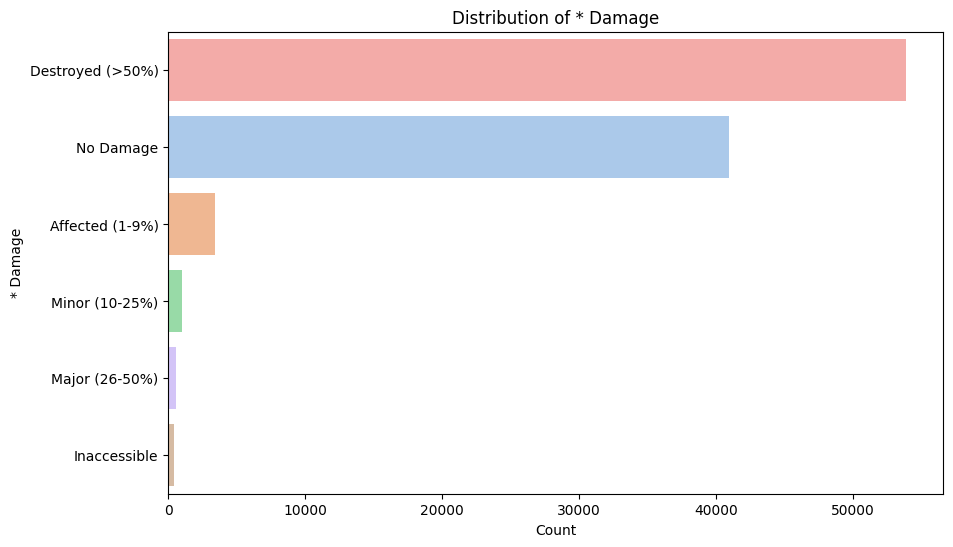

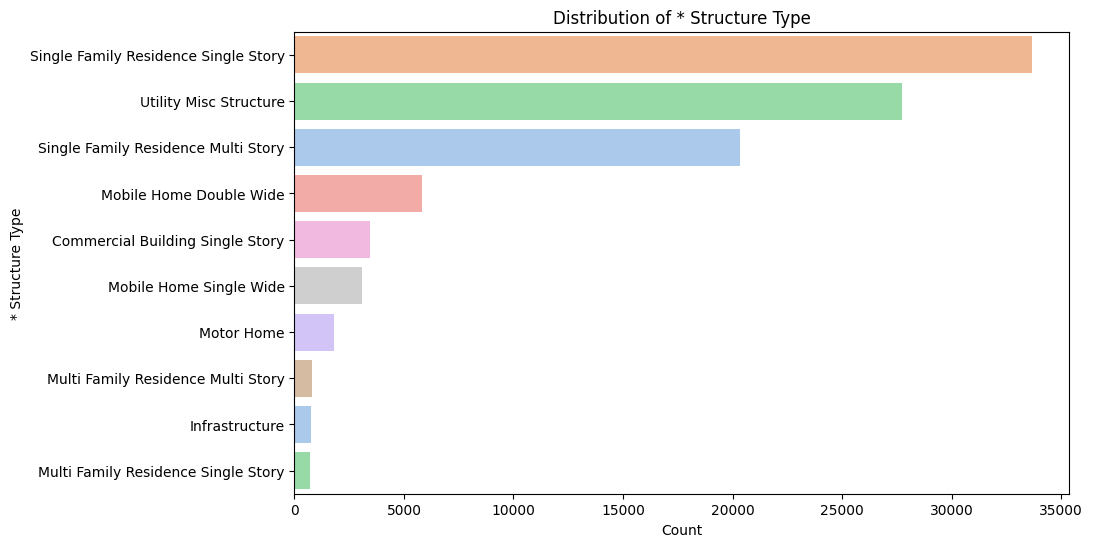

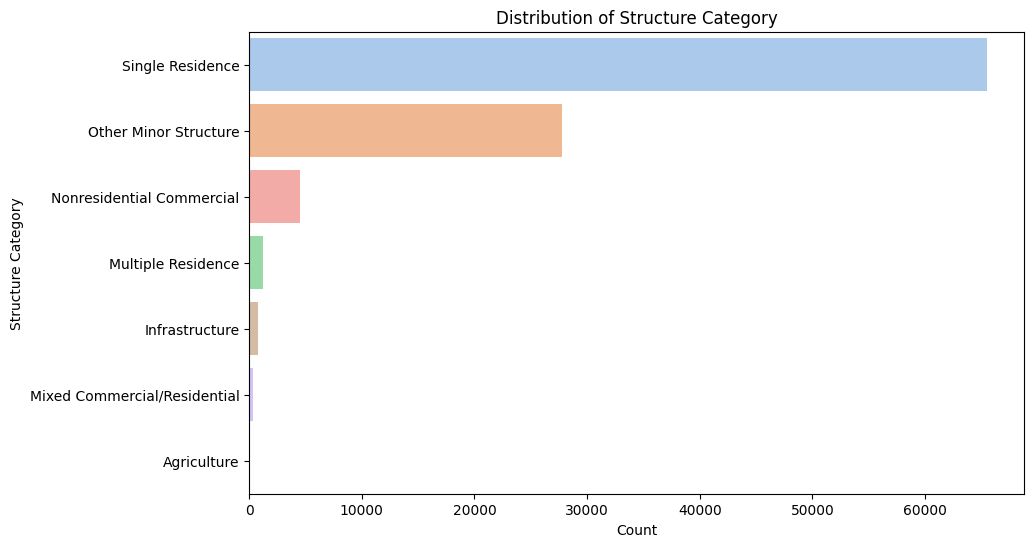

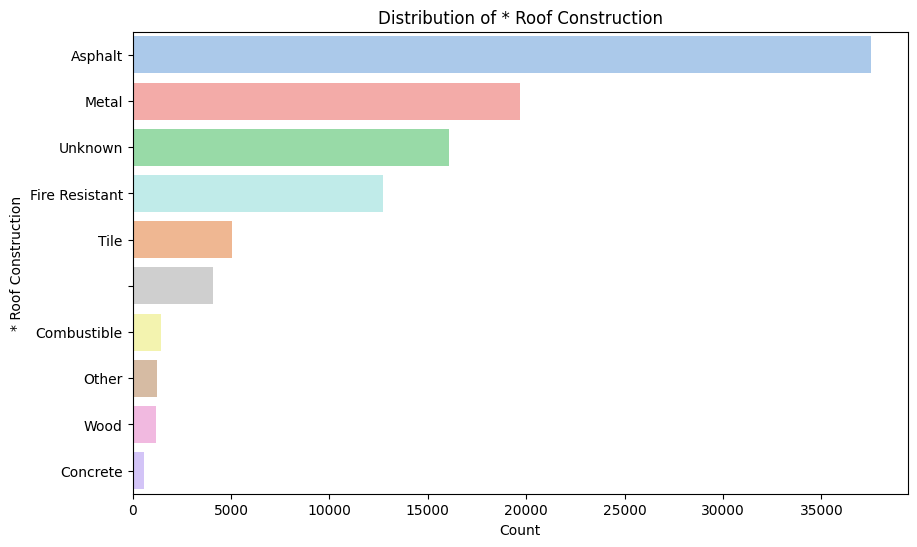

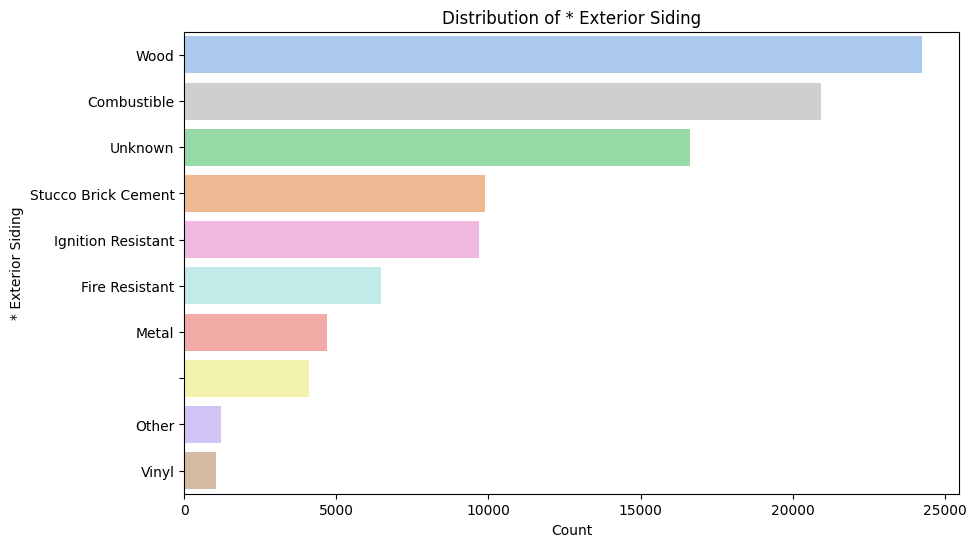

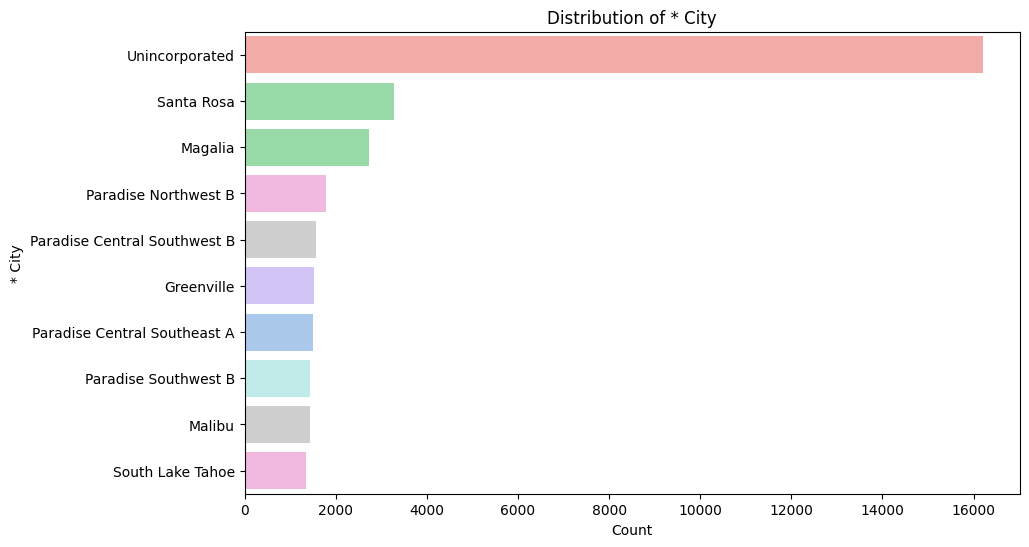

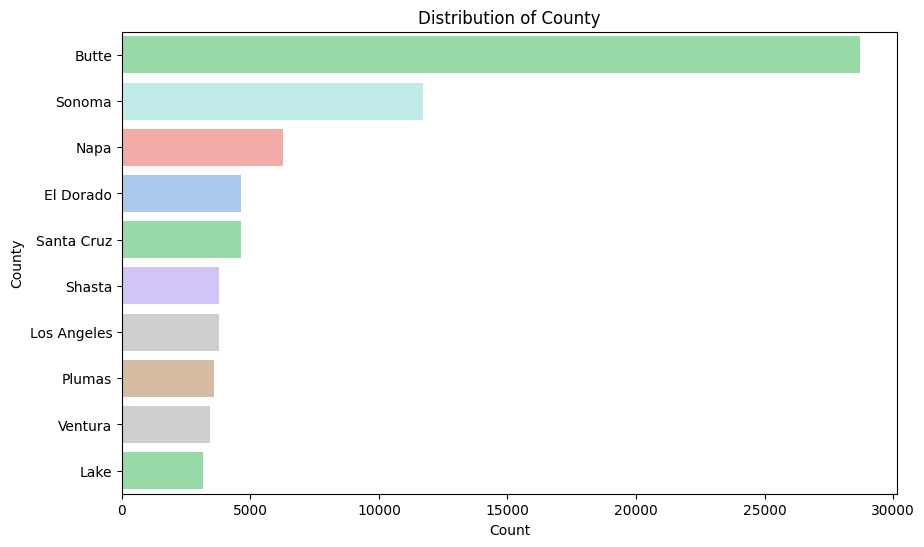

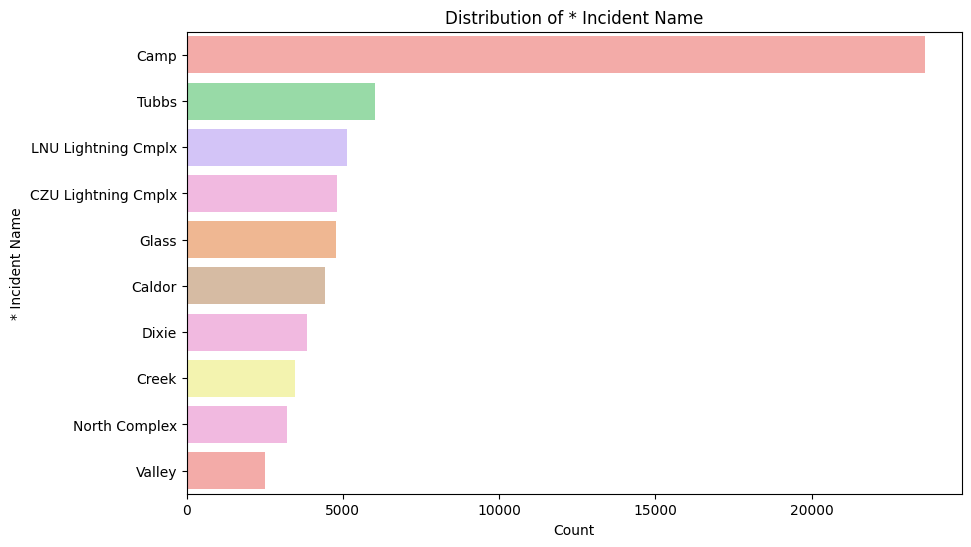

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


categorical_columns = [
    "* Damage", "* Structure Type", "Structure Category", 
    "* Roof Construction", "* Exterior Siding", "* City", 
    "County", "* Incident Name"
]


categorical_columns = [col for col in categorical_columns if col in df.columns]


if categorical_columns:
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        order = df[col].value_counts().index[:10]  
        
        
        sns.countplot(y=df[col], hue=df[col], palette="pastel", order=order, legend=False)
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)

        
        plt.show()
else:
    print("No categorical columns found in the dataset.")


In [ ]:

import folium
from folium.plugins import HeatMap
from IPython.display import display


df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")

if "Latitude" in df.columns and "Longitude" in df.columns:
    
    df_geo = df[['Latitude', 'Longitude']].dropna()

    
    center_lat = df_geo["Latitude"].mean()
    center_lon = df_geo["Longitude"].mean()

    
    fire_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    
    HeatMap(df_geo.values, radius=10, blur=15).add_to(fire_map)

    
    display(fire_map)
else:
    print("Latitude and Longitude columns not found in dataset.")


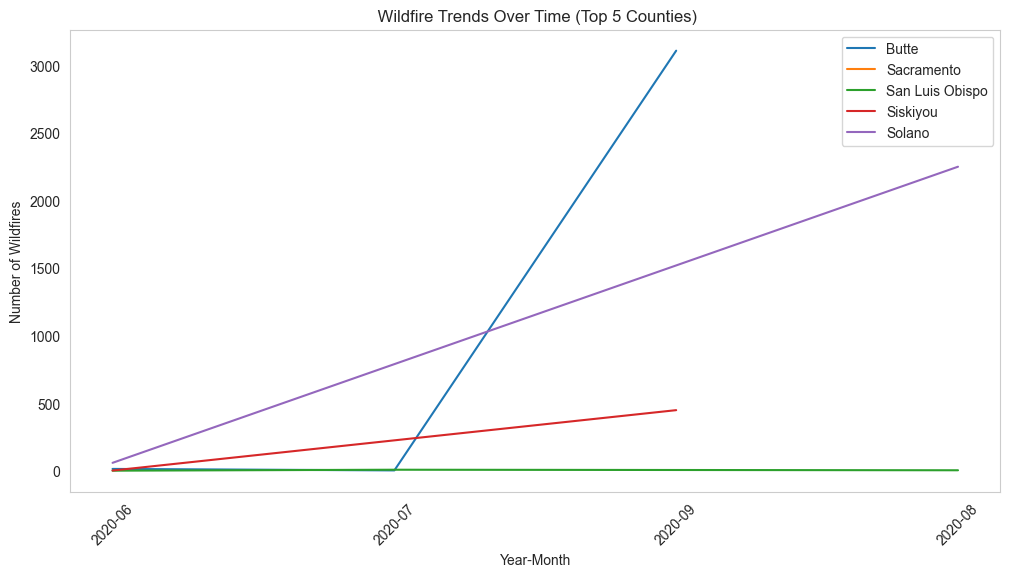

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap




if "Incident Start Date" in df.columns:
    df["Incident Start Date"] = pd.to_datetime(df["Incident Start Date"], errors='coerce')



if "Incident Start Date" in df.columns and "County" in df.columns:
    
    df["Year-Month"] = df["Incident Start Date"].dt.to_period("M")


    county_fire_counts = df.groupby(["Year-Month", "County"]).size().reset_index(name="Fire Incidents")

    
    plt.figure(figsize=(12, 6))
    for county in county_fire_counts["County"].unique()[:5]:  
        subset = county_fire_counts[county_fire_counts["County"] == county]
        plt.plot(subset["Year-Month"].astype(str), subset["Fire Incidents"], label=county)

    plt.xticks(rotation=45)
    plt.xlabel("Year-Month")
    plt.ylabel("Number of Wildfires")
    plt.title(" Wildfire Trends Over Time (Top 5 Counties)")
    plt.legend()
    plt.grid()
    plt.show()




if "Latitude" in df.columns and "Longitude" in df.columns:
    df_geo = df[['Latitude', 'Longitude']].dropna()

    
    center_lat = df_geo["Latitude"].mean()
    center_lon = df_geo["Longitude"].mean()

    
    fire_map = folium.Map(location=[center_lat, center_lon], zoom_start=7)

    
    HeatMap(df_geo.values, radius=10, blur=15).add_to(fire_map)

    
    



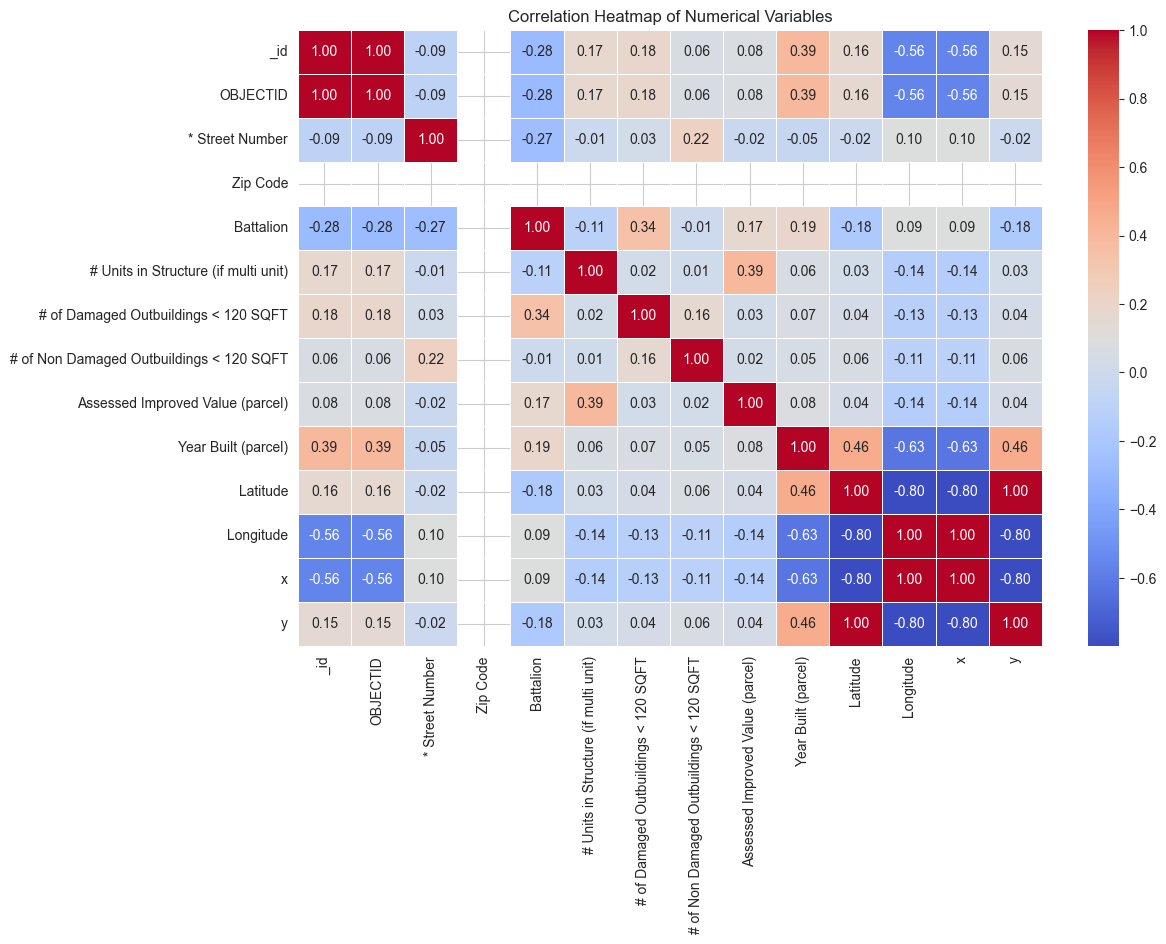

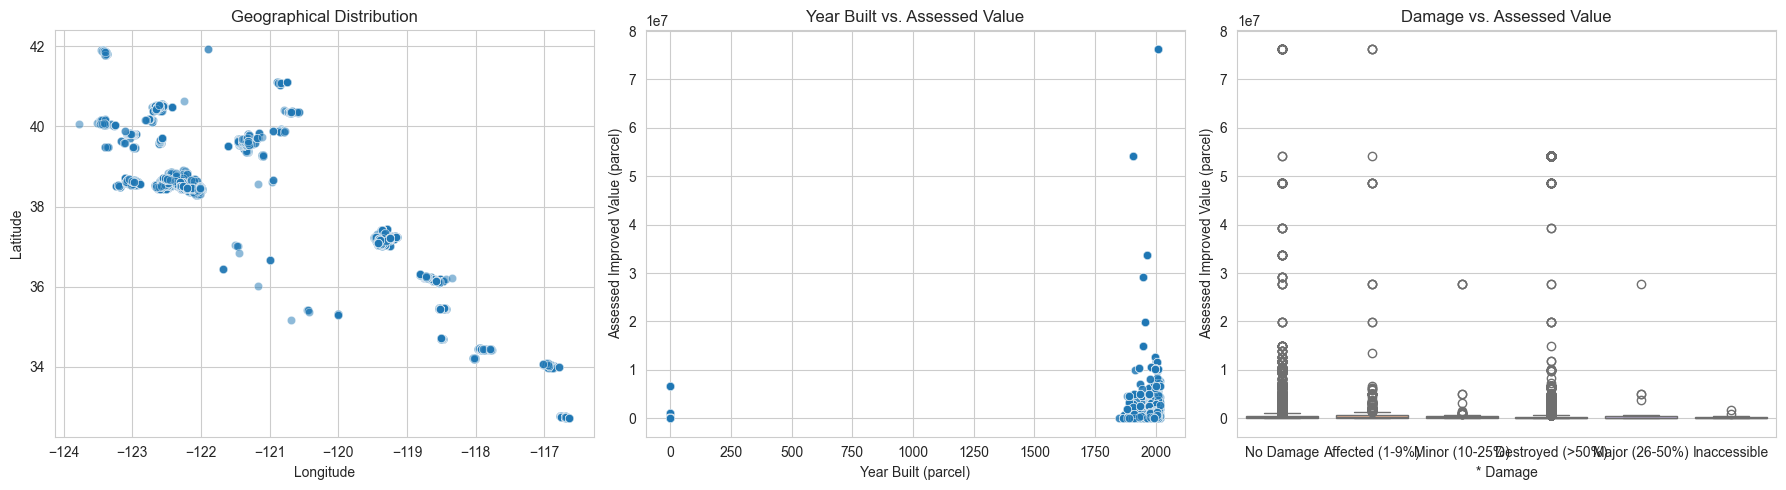

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

numeric_columns = df.select_dtypes(include=['number']).columns  
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

if "Latitude" in df.columns and "Longitude" in df.columns:
    sns.scatterplot(x=df["Longitude"], y=df["Latitude"], ax=axes[0], alpha=0.5)
    axes[0].set_title("Geographical Distribution")

if "Year Built (parcel)" in df.columns and "Assessed Improved Value (parcel)" in df.columns:
    sns.scatterplot(x=df["Year Built (parcel)"], y=df["Assessed Improved Value (parcel)"], ax=axes[1], alpha=0.6)
    axes[1].set_title("Year Built vs. Assessed Value")

if "* Damage" in df.columns and "Assessed Improved Value (parcel)" in df.columns:
    sns.boxplot(x=df["* Damage"], y=df["Assessed Improved Value (parcel)"], hue=df["* Damage"], ax=axes[2], palette="pastel", dodge=False)
    axes[2].set_title("Damage vs. Assessed Value")

plt.tight_layout()
plt.show()


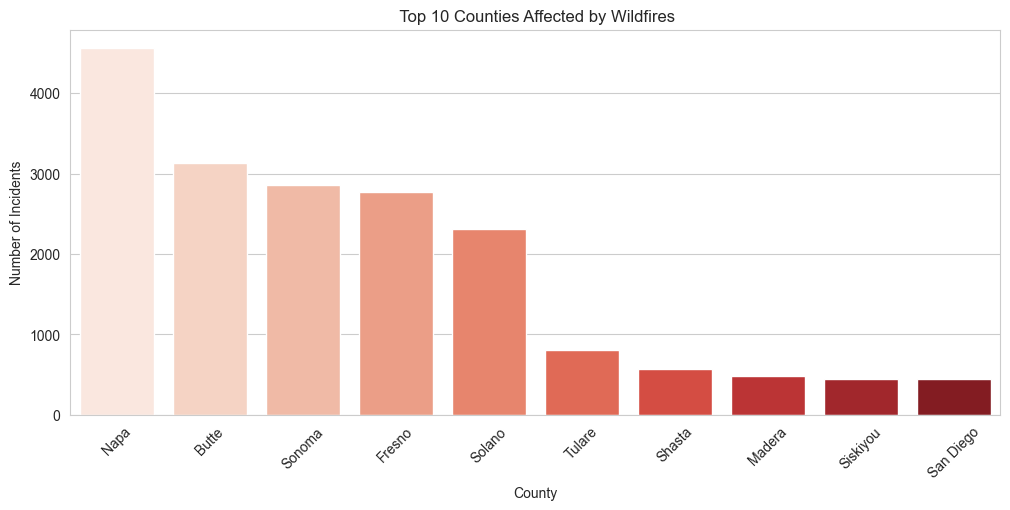

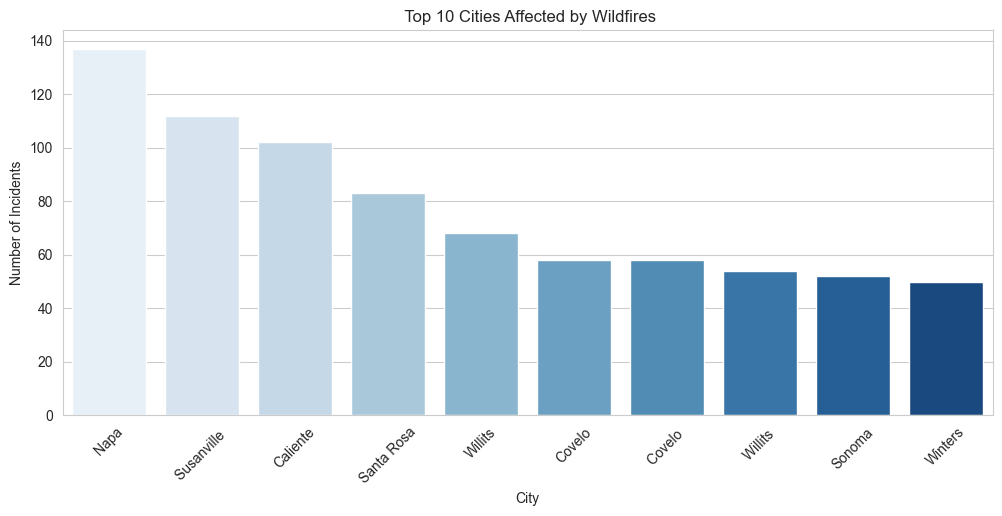

In [ ]:



county_counts = df["County"].value_counts().head(10)
city_counts = df["* City"].value_counts().head(10)  


plt.figure(figsize=(12, 5))
sns.barplot(x=county_counts.index, y=county_counts.values, hue=county_counts.index, palette="Reds", legend=False)
plt.xticks(rotation=45)
plt.title(" Top 10 Counties Affected by Wildfires")
plt.ylabel("Number of Incidents")
plt.xlabel("County")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette="Blues", legend=False)
plt.xticks(rotation=45)
plt.title(" Top 10 Cities Affected by Wildfires")
plt.ylabel("Number of Incidents")
plt.xlabel("City")
plt.show()


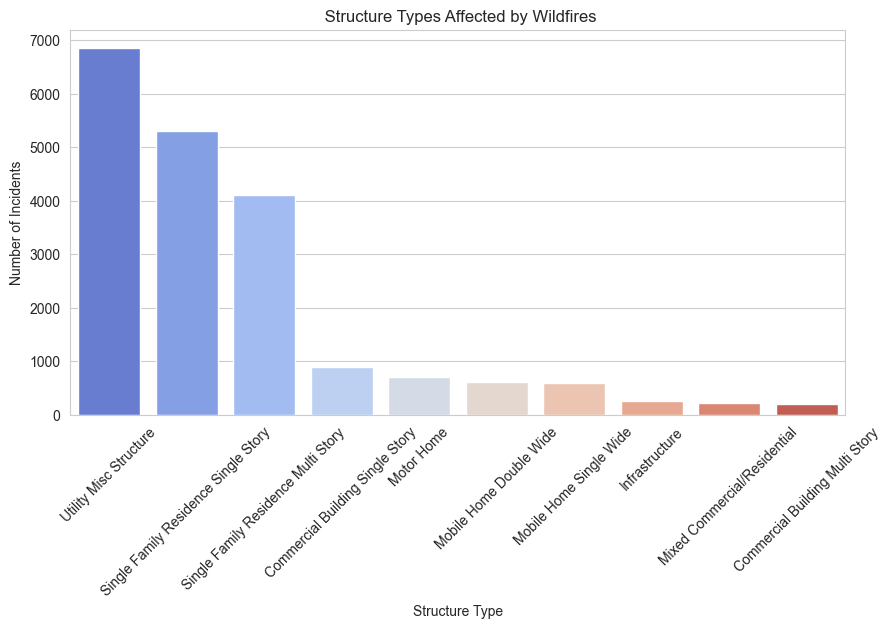

In [ ]:

if "* Structure Type" in df.columns:
    structure_counts = df["* Structure Type"].value_counts().head(10)


    plt.figure(figsize=(10, 5))
    sns.barplot(x=structure_counts.index, y=structure_counts.values, hue=structure_counts.index, palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title(" Structure Types Affected by Wildfires")
    plt.ylabel("Number of Incidents")
    plt.xlabel("Structure Type")
    plt.show()


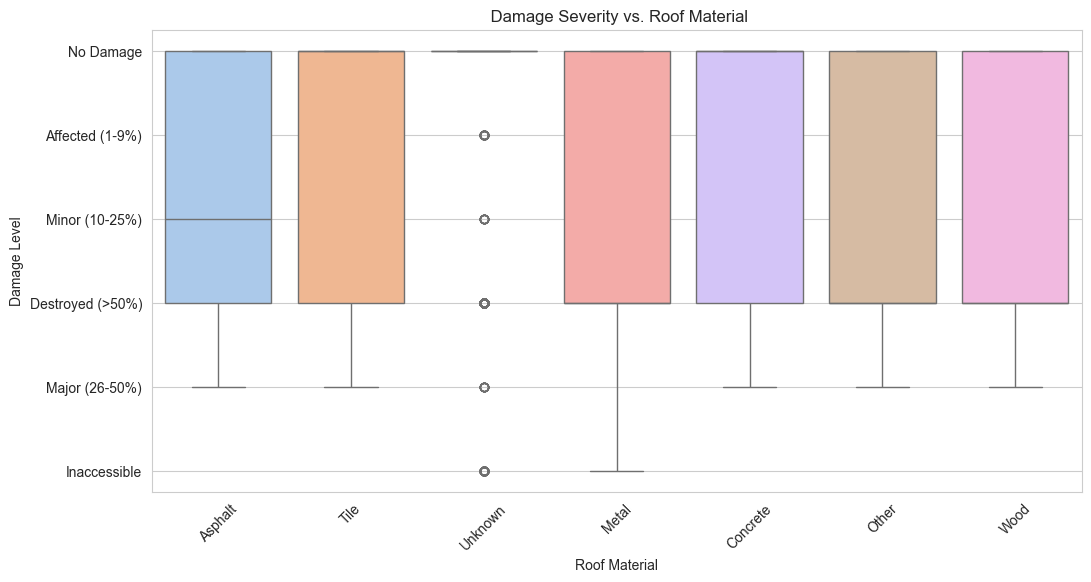

In [ ]:

if "* Damage" in df.columns and "* Roof Construction" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["* Roof Construction"], y=df["* Damage"], hue=df["* Roof Construction"], palette="pastel", legend=False)
    plt.xticks(rotation=45)
    plt.title(" Damage Severity vs. Roof Material")
    plt.ylabel("Damage Level")
    plt.xlabel("Roof Material")
    plt.show()
